# DS4023 Machine Learning :  Linear Regression Exercise


## Part2 : Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. 
One way to do this is to first collect information on recent houses sold and make a model of housing prices. The file data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path =  'data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### 2.1 Feature Normalization
By looking at the dataset values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

Firstly, perform Z-Score normalization on the dataset

In [3]:
for i in range(data2.shape[1]):
    row = data2.iloc[:,i]
    data2[data2.columns[i]] = (np.array(row) - np.mean(row))/(np.std(row, ddof=1))                                        
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


Insert a new column ones

In [4]:
data2.insert(0,'Ones',1)
data2.head()

,Ones,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


### 2.2 Gradient Descent

In part1, you implemented gradient descent on a univariate regression problem. The only difference now is that there is one more feature in the matrix X. The hypothesis function and the batch gradient descent update rule remain unchanged.

- We use the same setting for $\theta,\alpha$ and number of iterations
- Expected output for parameters are: $\theta$=``[ -1.1e-16,  8.84-01, -5.25e-2]``; expected output for cost: 0.13

In [5]:
alpha = 0.01
iters = 1500
theta2 = np.matrix(np.array([0,0,0]))
theta2.shape

(1, 3)

In [6]:
def computeCost(X, y, theta):
    # your implementation, same as Part1
    hx = np.matmul(X, np.transpose(theta))
    cost = 1/(2*len(hx))*sum(np.diag(((hx-y)*np.transpose(hx-y))))
    return cost

In [16]:
def gradientDescent(X, y, theta, alpha, iters):
    # your implementation
    theta_lst = theta.tolist()[0] 
    for i in range(iters):
        hx = np.dot(X, np.transpose(np.matrix(np.array(theta_lst))))
        for i in range(theta.shape[1]):
#             print(np.transpose(hx-y))
            theta_lst[i] = theta_lst[i]-(alpha/len(hx))*(np.dot(np.transpose(hx-y), X[:,i]))[0,0]
    theta = np.matrix(theta_lst)
    cost = computeCost(X, y, theta)
    return theta, cost
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

[[-0.47574687  0.08407444 -0.22862575  0.86702453 -1.59538948  0.32399786
   0.20403615  1.13094828  1.02697347  0.78305133  0.80305294 -0.05268191
   0.08328269 -2.87498104  0.64389575 -0.87561923  0.32399786  1.12374258
  -1.27627534 -2.06803861  0.69987788  0.68308324  0.77985235  0.64389575
  -1.86730269  0.72387022 -0.99238196 -1.02837047 -1.07635515  0.32399786
  -0.0758745   1.363666    0.20403615 -1.91528737  0.43596212  0.72387022
   0.88381916 -0.03668701 -1.66816625  0.42716493 -0.22462702  0.08407444
   0.21123385  0.33119556  1.28369153  0.32399786  0.80704367]]
[[-0.47574687  0.08407444 -0.22862575  0.86702453 -1.59538948  0.32399786
   0.20403615  1.13094828  1.02697347  0.78305133  0.80305294 -0.05268191
   0.08328269 -2.87498104  0.64389575 -0.87561923  0.32399786  1.12374258
  -1.27627534 -2.06803861  0.69987788  0.68308324  0.77985235  0.64389575
  -1.86730269  0.72387022 -0.99238196 -1.02837047 -1.07635515  0.32399786
  -0.0758745   1.363666    0.20403615 -1.9152873

[[-0.44919789 -0.19552337 -0.02227627  0.2629216  -0.81184229  0.49099942
  -0.11565231  0.74626437  0.61374016  0.4390655   0.94271997 -0.08930607
  -0.02015923 -0.98090899  0.16262981 -0.51727592 -0.33841875  0.62303875
  -0.73023489 -1.26566097  0.52172156  0.36568921  0.50268428  0.79692633
  -0.75587639  0.14055535 -1.35823541 -0.7454843  -0.9914925   0.67430922
  -0.42303281  0.29413324  0.40444659 -1.26125895  0.49727015  0.34526065
   0.38493764  0.21960737 -0.14658662  0.70168233 -0.67808629  0.19201959
   0.73176207 -0.19137589  0.33699576  0.41021069  0.28629452]]
[[-0.44919789 -0.19552337 -0.02227627  0.2629216  -0.81184229  0.49099942
  -0.11565231  0.74626437  0.61374016  0.4390655   0.94271997 -0.08930607
  -0.02015923 -0.98090899  0.16262981 -0.51727592 -0.33841875  0.62303875
  -0.73023489 -1.26566097  0.52172156  0.36568921  0.50268428  0.79692633
  -0.75587639  0.14055535 -1.35823541 -0.7454843  -0.9914925   0.67430922
  -0.42303281  0.29413324  0.40444659 -1.2612589

   0.82471011 -0.37373958  0.12241305  0.33258828  0.10464651]]
[[-0.41563288 -0.28289819  0.08231688  0.18293283 -0.61481186  0.4444705
  -0.21886449  0.61737648  0.47357415  0.32625493  0.88539286 -0.08069691
  -0.03794566 -0.48075643 -0.00441171 -0.48821745 -0.44144367  0.44831851
  -0.6270288  -1.06119177  0.47442006  0.39896155  0.4162693   0.74487833
  -0.2937429  -0.06679944 -1.47968454 -0.61065619 -0.93489134  0.83577288
  -0.40151851  0.16585982  0.37111547 -0.97981532  0.4089882   0.21877236
   0.21093728  0.20835256  0.34199517  0.69762632 -0.69856499  0.25773923
   0.82488984 -0.3747347   0.12166958  0.33176709  0.1036556 ]]
[[-0.41563288 -0.28289819  0.08231688  0.18293283 -0.61481186  0.4444705
  -0.21886449  0.61737648  0.47357415  0.32625493  0.88539286 -0.08069691
  -0.03794566 -0.48075643 -0.00441171 -0.48821745 -0.44144367  0.44831851
  -0.6270288  -1.06119177  0.47442006  0.39896155  0.4162693   0.74487833
  -0.2937429  -0.06679944 -1.47968454 -0.61065619 -0.9348913

[[-0.39293689 -0.31207768  0.13547943  0.20567664 -0.57075473  0.38405616
  -0.2548372   0.57039052  0.42175059  0.28616512  0.82034677 -0.06870538
  -0.03727615 -0.35543434 -0.06776315 -0.51620962 -0.42858091  0.38167339
  -0.62321635 -1.01394389  0.46242947  0.47028716  0.38750152  0.68209665
  -0.08721829 -0.14744271 -1.52347975 -0.54452477 -0.9023143   0.91332926
  -0.33523635  0.21664772  0.31636214 -0.85079515  0.33066446  0.17281568
   0.14460094  0.16306857  0.51110927  0.65543015 -0.65029515  0.29422752
   0.82437934 -0.44508521  0.08636224  0.25766338  0.03361387]]
[[-0.39275082 -0.31227191  0.13588886  0.20597869 -0.5705277   0.3835173
  -0.25508124  0.57006574  0.42139035  0.2858909   0.81977395 -0.06859778
  -0.03725156 -0.35472717 -0.06820791 -0.51651079 -0.42835129  0.38120449
  -0.62328435 -1.01369347  0.46236125  0.47094537  0.3873103   0.68154043
  -0.08568454 -0.14801424 -1.52378113 -0.54402026 -0.90205579  0.91391752
  -0.3346151   0.21727101  0.31586478 -0.8498296 

   0.81367813 -0.4818389   0.08153721  0.20627864 -0.00296912]]
[[-0.3781271  -0.32618197  0.1672705   0.23320079 -0.55672652  0.33985462
  -0.27272786  0.54636136  0.39502508  0.26597969  0.77356362 -0.05986199
  -0.03474338 -0.30879883 -0.10091402 -0.54233985 -0.4065642   0.34668671
  -0.6316195  -0.99813724  0.45790583  0.52488958  0.3736267   0.63657562
   0.0300529  -0.19023161 -1.54573047 -0.50550518 -0.88199707  0.95871684
  -0.28344502  0.27249067  0.27531591 -0.77672298  0.27648068  0.1493602
   0.10978636  0.12730031  0.59484106  0.62138297 -0.60854343  0.31672478
   0.81356668 -0.48213718  0.08153016  0.20583174 -0.003266  ]]
[[-0.3781271  -0.32618197  0.1672705   0.23320079 -0.55672652  0.33985462
  -0.27272786  0.54636136  0.39502508  0.26597969  0.77356362 -0.05986199
  -0.03474338 -0.30879883 -0.10091402 -0.54233985 -0.4065642   0.34668671
  -0.6316195  -0.99813724  0.45790583  0.52488958  0.3736267   0.63657562
   0.0300529  -0.19023161 -1.54573047 -0.50550518 -0.881997

   0.80481119 -0.50351114  0.0820297   0.17287434 -0.02453841]]
[[-0.36890172 -0.3340164   0.18651514  0.25279106 -0.55082548  0.31139911
  -0.28279631  0.53267108  0.37974391  0.25455729  0.74358492 -0.05415688
  -0.03276165 -0.2865221  -0.11998626 -0.56013298 -0.39022341  0.32653131
  -0.63895334 -0.99118688  0.45572416  0.56045649  0.36592767  0.60734159
   0.09973228 -0.21499045 -1.55837143 -0.48199559 -0.8695222   0.98598364
  -0.24953669  0.31165271  0.24872209 -0.73253176  0.24213547  0.13600842
   0.08973251  0.10382057  0.64186843  0.5989187  -0.58055865  0.3304859
   0.80481119 -0.50351114  0.0820297   0.17287434 -0.02453841]]
[[-0.36890172 -0.3340164   0.18651514  0.25279106 -0.55082548  0.31139911
  -0.28279631  0.53267108  0.37974391  0.25455729  0.74358492 -0.05415688
  -0.03276165 -0.2865221  -0.11998626 -0.56013298 -0.39022341  0.32653131
  -0.63895334 -0.99118688  0.45572416  0.56045649  0.36592767  0.60734159
   0.09973228 -0.21499045 -1.55837143 -0.48199559 -0.869522

   0.79882934 -0.5167128   0.08308751  0.15182116 -0.03767684]]
[[-0.36304815 -0.33878654  0.19860803  0.26573732 -0.5476802   0.29314941
  -0.28895765  0.52425431  0.37033643  0.24755279  0.72438667 -0.05049551
  -0.03141894 -0.27381725 -0.13175456 -0.57174286 -0.37930072  0.31408848
  -0.64404987 -0.98738816  0.45447418  0.58335194  0.36124184  0.58860708
   0.14323258 -0.23029999 -1.56613476 -0.46724677 -0.86164507  1.00307221
  -0.22767411  0.33742508  0.23163172 -0.70490379  0.22021806  0.12780243
   0.07735292  0.08866945  0.67062445  0.58439995 -0.56238486  0.33916403
   0.79882934 -0.5167128   0.08308751  0.15182116 -0.03767684]]
[[-0.36304815 -0.33878654  0.19860803  0.26573732 -0.5476802   0.29314941
  -0.28895765  0.52425431  0.37033643  0.24755279  0.72438667 -0.05049551
  -0.03141894 -0.27381725 -0.13175456 -0.57174286 -0.37930072  0.31408848
  -0.64404987 -0.98738816  0.45447418  0.58335194  0.36124184  0.58860708
   0.14323258 -0.23029999 -1.56613476 -0.46724677 -0.86164

   0.79380723 -0.52738311  0.08418693  0.13457744 -0.04829586]]
[[-0.35826624 -0.34261959  0.20844951  0.27647728 -0.54530097  0.27817909
  -0.29391884  0.51746415  0.36274289  0.24190787  0.70864715 -0.04749129
  -0.03029497 -0.26389249 -0.14126253 -0.58132884 -0.3702017   0.30403353
  -0.64835407 -0.98447905  0.45349569  0.60215987  0.35747717  0.57324361
   0.17854286 -0.24267961 -1.57239503 -0.45525155 -0.85522222  1.01696477
  -0.20970374  0.35877244  0.21760152 -0.68246466  0.20227353  0.1211832
   0.06734925  0.07621182  0.69377186  0.57245511 -0.54740579  0.34623642
   0.79380723 -0.52738311  0.08418693  0.13457744 -0.04829586]]
[[-0.35822559 -0.34265201  0.20853308  0.27656898 -0.54528122  0.27805167
  -0.29396084  0.51740664  0.36267857  0.24186008  0.70851321 -0.04746572
  -0.03028535 -0.26380925 -0.1413431  -0.58141058 -0.37012392  0.30394833
  -0.64839101 -0.98445479  0.45348748  0.60232001  0.35744532  0.57311286
   0.17884247 -0.24278453 -1.57244805 -0.45514971 -0.855167

   0.79063977 -0.53401099  0.08493246  0.12380822 -0.05489185]]
[[-0.35528296 -0.34499474  0.21457982  0.28321915 -0.54386486  0.2688239
  -0.2969957   0.51324969  0.35802874  0.23840575  0.69881353 -0.04561372
  -0.02958689 -0.25781583 -0.14716745 -0.58733501 -0.36448048  0.2977884
  -0.651075   -0.98271335  0.45289605  0.61391996  0.35514454  0.56364389
   0.20051458 -0.25037067 -1.5762799  -0.44778164 -0.85121828  1.02561481
  -0.19846461  0.37216476  0.20883108 -0.6684987   0.1910684   0.11707506
   0.06113601  0.06841951  0.70812563  0.56498176 -0.53802723  0.35064437
   0.79063977 -0.53401099  0.08493246  0.12380822 -0.05489185]]
[[-0.35525515 -0.34501685  0.21463695  0.2832821  -0.54385158  0.26873664
  -0.29702434  0.51321045  0.35798484  0.23837314  0.69872182 -0.0455962
  -0.02958028 -0.25775944 -0.14722244 -0.58739106 -0.36442704  0.29773023
  -0.65110045 -0.98269699  0.45289048  0.61402967  0.35512283  0.56355436
   0.2007193  -0.25044231 -1.57631608 -0.44771202 -0.85118096

[[-0.35324196 -0.34661583  0.21877156  0.28784147 -0.54289385  0.26241988
  -0.29909635  0.51037157  0.35480912  0.23601446  0.69208254 -0.04432839
  -0.02910083 -0.25368597 -0.15120087 -0.59145022 -0.36055571  0.29352247
  -0.65294501 -0.98151709  0.45248839  0.62197185  0.35355252  0.55707275
   0.21553273 -0.25562478 -1.57893277 -0.44267437 -0.84847974  1.03152861
  -0.19076876  0.38134476  0.20282669 -0.65895189  0.18340009  0.11426961
   0.05689188  0.0630836   0.71792489  0.55986382 -0.53160293  0.35365901
   0.78846458 -0.5385385   0.08545673  0.11643782 -0.05939756]]
[[-0.35322294 -0.34663093  0.21881063  0.28788458 -0.54288482  0.26236017
  -0.29911592  0.51034476  0.35477912  0.23599217  0.69201978 -0.04431641
  -0.0290963  -0.25364753 -0.15123845 -0.5914886  -0.3605191   0.29348271
  -0.65296246 -0.98150596  0.4524846   0.62204693  0.35353769  0.55701148
   0.2156727  -0.25567375 -1.57895749 -0.44262677 -0.84845422  1.03158373
  -0.190697    0.38143038  0.20277071 -0.6588629

   0.78710233 -0.54136842  0.08578789  0.11182772 -0.06221385]]
[[-0.35196552 -0.34762878  0.22139257  0.29073456 -0.54228923  0.25841392
  -0.30040909  0.50857278  0.35279683  0.23452001  0.68787217 -0.04352436
  -0.02879647 -0.25110947 -0.1537219  -0.59402531 -0.35809869  0.29085607
  -0.65411648 -0.98077165  0.45223403  0.62700898  0.35255774  0.55296232
   0.22492198 -0.25890895 -1.58059075 -0.43948102 -0.84676722  1.03522617
  -0.18595421  0.38709005  0.19907057 -0.6529831   0.17860375  0.11251624
   0.05423911  0.05974538  0.72404858  0.55666188 -0.52758331  0.35554414
   0.78710233 -0.54136842  0.08578789  0.11182772 -0.06221385]]
[[-0.35195199 -0.34763951  0.22142035  0.29076524 -0.54228282  0.25837146
  -0.30042301  0.50855372  0.35277551  0.23450417  0.68782754 -0.04351584
  -0.02879324 -0.25108217 -0.15374862 -0.59405261 -0.35807264  0.29082781
  -0.65412891 -0.98076375  0.45223134  0.62706238  0.3525472   0.55291874
   0.22502149 -0.25894376 -1.58060832 -0.43944717 -0.84674

   0.78609228 -0.54346512  0.08603422  0.10841117 -0.06430046]]
[[-0.35101959 -0.34837918  0.22333475  0.29287917 -0.54184191  0.25544501
  -0.30138164  0.50724011  0.35130596  0.23341284  0.68475181 -0.04292847
  -0.02857081 -0.2492019  -0.15558973 -0.59593401 -0.35627719  0.28888053
  -0.65498517 -0.98021999  0.4520457   0.63074222  0.3518208   0.549916
   0.23187911 -0.26134223 -1.58181909 -0.43711475 -0.84549819  1.03796604
  -0.18238589  0.39134882  0.19628678 -0.64856036  0.1750492   0.11121722
   0.05227367  0.05727124  0.72858527  0.55428871 -0.524604    0.35694108
   0.78609228 -0.54346512  0.08603422  0.10841117 -0.06430046]]
[[-0.35101014 -0.34838668  0.22335417  0.29290061 -0.54183744  0.25541533
  -0.30139136  0.50722678  0.35129106  0.23340177  0.68472061 -0.04292251
  -0.02856855 -0.24918283 -0.15560841 -0.5959531  -0.35625898  0.28886079
  -0.65499386 -0.98021448  0.45204382  0.63077954  0.35181343  0.54988554
   0.23194866 -0.26136655 -1.58183137 -0.43709109 -0.8454855

   0.78535119 -0.54500304  0.0862152   0.10590487 -0.06583097]]
[[-0.3503257  -0.34892957  0.22475941  0.29445257 -0.54151401  0.25326707
  -0.30209497  0.50626261  0.35021244  0.23260075  0.68246277 -0.04249133
  -0.02840524 -0.24780314 -0.15695977 -0.59733428 -0.3549408   0.2874315
  -0.65562257 -0.97981556  0.45190761  0.63348089  0.35128028  0.54768127
   0.2369823  -0.26312702 -1.58272005 -0.43537902 -0.84456729  1.03997581
  -0.17976819  0.39447324  0.19424462 -0.64531619  0.17244169  0.11026441
   0.05083204  0.05545621  0.73191277  0.55254774 -0.52241834  0.35796579
   0.78535119 -0.54500304  0.0862152   0.10590487 -0.06583097]]
[[-0.35031923 -0.3489347   0.22477269  0.29446723 -0.54151095  0.25324677
  -0.30210162  0.5062535   0.35020224  0.23259318  0.68244143 -0.04248726
  -0.0284037  -0.2477901  -0.15697254 -0.59734733 -0.35492834  0.28741799
  -0.65562852 -0.97981179  0.45190632  0.63350642  0.35127525  0.54766044
   0.23702987 -0.26314366 -1.58272845 -0.43536284 -0.844558

[[-0.34987349 -0.34928824  0.22568785  0.295478   -0.54130037  0.25184769
  -0.30255982  0.50562561  0.34949981  0.23207154  0.68097098 -0.04220645
  -0.02829734 -0.24689171 -0.15785259 -0.59824687 -0.35406982  0.28648719
  -0.65603801 -0.97955205  0.45181762  0.63526572  0.35092805  0.54622488
   0.24030798 -0.26429013 -1.58330718 -0.43424786 -0.84396063  1.04128555
  -0.1780622   0.39650951  0.19291372 -0.643202    0.17074236  0.1096435
   0.04989256  0.05427333  0.7340812   0.55141313 -0.5209939   0.35863359
   0.78486817 -0.54600526  0.08633323  0.1042715  -0.06682836]]
[[-0.34987349 -0.34928824  0.22568785  0.295478   -0.54130037  0.25184769
  -0.30255982  0.50562561  0.34949981  0.23207154  0.68097098 -0.04220645
  -0.02829734 -0.24689171 -0.15785259 -0.59824687 -0.35406982  0.28648719
  -0.65603801 -0.97955205  0.45181762  0.63526572  0.35092805  0.54622488
   0.24030798 -0.26429013 -1.58330718 -0.43424786 -0.84396063  1.04128555
  -0.1780622   0.39650951  0.19291372 -0.643202  

   0.78453058 -0.54670572  0.08641573  0.10312992 -0.06752545]]
[[-0.34955744 -0.34953891  0.22633675  0.2961947  -0.54115108  0.25085565
  -0.30288471  0.5051804   0.34900176  0.23170167  0.67992835 -0.04200734
  -0.02822192 -0.24625473 -0.15847658 -0.59888469 -0.35346107  0.28582722
  -0.65632838 -0.9793679   0.45175473  0.63651317  0.35068188  0.54520699
   0.24263233 -0.26510304 -1.58371753 -0.43345728 -0.84353662  1.04220095
  -0.17686985  0.39793271  0.19198353 -0.64172438  0.16955467  0.10920954
   0.04923596  0.05344659  0.73559672  0.55062013 -0.51999833  0.35910033
   0.78453058 -0.54670572  0.08641573  0.10312992 -0.06752545]]
[[-0.34955428 -0.34954142  0.22634323  0.29620187 -0.54114959  0.25084573
  -0.30288796  0.50517595  0.34899678  0.23169798  0.67991792 -0.04200535
  -0.02822116 -0.24624837 -0.15848282 -0.59889107 -0.35345498  0.28582062
  -0.65633129 -0.97936605  0.4517541   0.63652564  0.35067941  0.54519681
   0.24265556 -0.26511117 -1.58372163 -0.43344938 -0.84353

   0.78426923 -0.54724797  0.08647961  0.10224617 -0.06806509]]
[[-0.34931277 -0.34973297  0.22683908  0.29674954 -0.54103551  0.25008768
  -0.30313622  0.50483575  0.3486162   0.23141535  0.6791212  -0.0418532
  -0.02816353 -0.24576164 -0.15895964 -0.59937846 -0.3529898   0.2853163
  -0.65655317 -0.97922534  0.45170605  0.63747887  0.3504913   0.54441899
   0.24443169 -0.26573234 -1.58403519 -0.43284526 -0.84320838  1.04290959
  -0.1759468   0.39903448  0.19126344 -0.64058049  0.16863523  0.10887359
   0.04872766  0.05280658  0.73676994  0.55000623 -0.51922762  0.35946164
   0.78426923 -0.54724797  0.08647961  0.10224617 -0.06806509]]
[[-0.34931277 -0.34973297  0.22683908  0.29674954 -0.54103551  0.25008768
  -0.30313622  0.50483575  0.3486162   0.23141535  0.6791212  -0.0418532
  -0.02816353 -0.24576164 -0.15895964 -0.59937846 -0.3529898   0.2853163
  -0.65655317 -0.97922534  0.45170605  0.63747887  0.3504913   0.54441899
   0.24443169 -0.26573234 -1.58403519 -0.43284526 -0.84320838 

   0.78413303 -0.54753055  0.0865129   0.10178562 -0.06834631]]
[[-0.34918526 -0.3498341   0.22710086  0.29703868 -0.54097528  0.24968747
  -0.30326729  0.50465615  0.34841527  0.23126614  0.67870058 -0.04177287
  -0.0281331  -0.24550468 -0.15921137 -0.59963578 -0.35274421  0.28505005
  -0.65667032 -0.97915105  0.45168068  0.63798213  0.35039199  0.54400835
   0.24536938 -0.26606028 -1.58420073 -0.43252633 -0.84303733  1.04327888
  -0.17546577  0.39960864  0.19088817 -0.63998438  0.16815608  0.10869852
   0.04846277  0.05247305  0.73738133  0.54968631 -0.51882598  0.35964993
   0.78413303 -0.54753055  0.0865129   0.10178562 -0.06834631]]
[[-0.34918526 -0.3498341   0.22710086  0.29703868 -0.54097528  0.24968747
  -0.30326729  0.50465615  0.34841527  0.23126614  0.67870058 -0.04177287
  -0.0281331  -0.24550468 -0.15921137 -0.59963578 -0.35274421  0.28505005
  -0.65667032 -0.97915105  0.45168068  0.63798213  0.35039199  0.54400835
   0.24536938 -0.26606028 -1.58420073 -0.43252633 -0.84303

   0.78402147 -0.54776201  0.08654017  0.10140839 -0.06857665]]


In [8]:
# set X (training data) and y (target variable)
X2 = data2.loc[:, ['Ones', 'Size', 'Bedrooms']]
y2 = data2.loc[:, ['Price']]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)


# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)
g2

matrix([[-1.10904194e-16,  8.84042349e-01, -5.24551809e-02]])

Get the cost of the model

In [9]:
# get the cost (error) of the model
computeCost(X2, y2, g2)

0.13068670606095906

Plotting the learning process

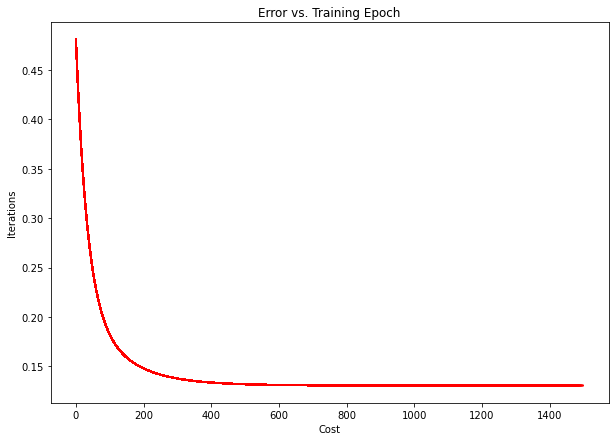

In [27]:
# your code for plotting
def plotError(X, y, theta, alpha, iters):
   # your implementation
    theta_lst = theta.tolist()[0]
    loss = []
    plt.figure(figsize=(10,7))
    for i in range(iters):
        hx = np.dot(X, np.transpose(np.matrix(np.array(theta_lst))))
        for i in range(theta.shape[1]):
            theta_lst[i] = theta_lst[i]-(alpha/len(hx))*(np.dot(np.transpose(hx-y), X[:,i]))[0,0]
        loss.append(computeCost(X, y, np.matrix(theta_lst)))
        
        plt.title('Error vs. Training Epoch')
        plt.xlabel('Cost')
        plt.ylabel('Iterations')
        plt.plot(loss, '-r')
plotError(X2, y2, theta2, alpha, iters)

### Using ``scikit-learn``
We can also using the ``LinearRegression()`` function provided in ``scikit-learn`` instead of implementing by ourselves. Using the data in both part1 and part2 to compare the model and performance.

In [6]:
path =  'data1.txt'
ndata1 = pd.read_csv(path, header=None, names=['Population', 'Profit'])
# no need to insert ones using linear gression model
nX1 = ndata1.loc[:, ['Population']]
ny1 = ndata1.loc[:, ['Profit']]
path =  'data2.txt'
ndata2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])

# Note that the linear regression model of sklearn will not perform feature scaling
for i in range(ndata2.shape[1]):
    row = ndata2.iloc[:,i]
    ndata2[ndata2.columns[i]] = (np.array(row) - np.mean(row))/(np.std(row, ddof=1))                                        

nX2 = ndata2.loc[:, ['Size', 'Bedrooms']]
ny2 = ndata2.loc[:, ['Price']]

In [7]:
from sklearn import linear_model

# linear model for ndata1
model1 = linear_model.LinearRegression(fit_intercept=True,normalize=False)
model1.fit(nX1, ny1)
# print (model)
# 训练后模型截距
# print (model1.intercept_)
# 训练后模型系数
# print (model1.coef_)
#print the parameters
print("Coefficient",model1.coef_,"\nIntercept", model1.intercept_)

Coefficient [[1.19303364]] 
Intercept [-3.89578088]


In [8]:
# linear model for ndata2
model2 = linear_model.LinearRegression(normalize=True)
model2.fit(nX2, ny2)

# 训练后模型截距
# print (model2.intercept_)
# 训练后模型系数
# print (model2.coef_)
#print the parameters
print("Coefficient",model2.coef_,"\nIntercept", model2.intercept_)

Coefficient [[ 0.88476599 -0.05317882]] 
Intercept [-9.2685233e-17]
